<br>
<h1 align="center"> Lending Club </h1>

<br>

### Introduction

These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

<br>

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
# load the data. It's big, set low_memory=False
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan.csv', low_memory=False)

(2260668, 145)

In [29]:
'''How many rows and columns?'''
loan_data.shape

(2260668, 142)

In [14]:
# Take a glance
loan_data.head()

'Dec-2018'

In [4]:
# A glance of the distribution
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [5]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0 and null_count < total_records*(0.1):
            null_pct = 'less than 10%'
        elif null_count >= total_records*(0.1) and null_count < total_records*(0.2):
            null_pct = '10 to 20%'
        elif null_count >= total_records*(0.2) and null_count < total_records*(0.3):
            null_pct = '20 to 30%'
        elif null_count >= total_records*(0.3) and null_count < total_records*(0.4):
            null_pct = '30 to 40%'
        elif null_count >= total_records*(0.4) and null_count < total_records*(0.5):
            null_pct = '40 to 50%'
        elif null_count >= total_records*(0.5) and null_count < total_records*(0.75):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.9):
            null_pct = 'more than 90%'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)
display(HTML(loan_data_info.to_html()))
    
    

,col,null_count,null_pct,d_type,n_unique
0,id,all,100%,float64,0
1,member_id,all,100%,float64,0
2,loan_amnt,0,None,int64,1572
3,funded_amnt,0,None,int64,1572
4,funded_amnt_inv,0,None,float64,10057
5,term,0,None,object,2
6,int_rate,0,None,float64,673
7,installment,0,None,float64,93296
8,grade,0,None,object,7
9,sub_grade,0,None,object,35


In [6]:
'''
Drop the manually identified (from the above meta data or the data description) columns if any.

i) There are 4 columns having all null values, first drop them.
ii) Drop the current loans as we are going to determine if the loan us bad or good loan.

'''
all_null_cols = loan_data_info[loan_data_info['null_count']=='all'].col
all_null_cols

loan_data.drop(all_null_cols, axis=1, inplace=True)


In [51]:
loan_data[loan_data["loan_status"]=='Current']

indexNames = loan_data[loan_data["loan_status"]=='Current'].index
loan_data.drop(indexNames , inplace=True)

In [52]:
'''How many columns have 90% or more data null?'''
len(loan_data_info[loan_data_info['null_pct']=='more than 90%'])

35

In [53]:
'''
Convert the String date columns into python datetime
'''
loan_data['issue_d'] = loan_data['issue_d'].astype('datetime64[ns]')
loan_data['issue_d'][2]

KeyError: 2

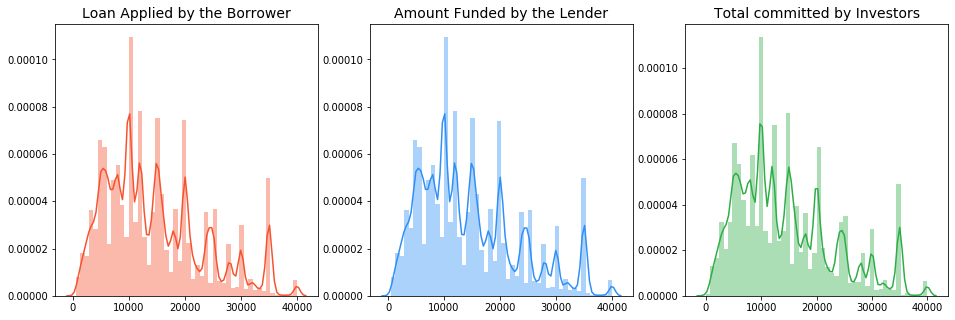

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = loan_data["loan_amnt"].values
funded_amount = loan_data["funded_amnt"].values
investor_funds = loan_data["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

plt.show()

Text(0, 0.5, 'Average loan amount issued')

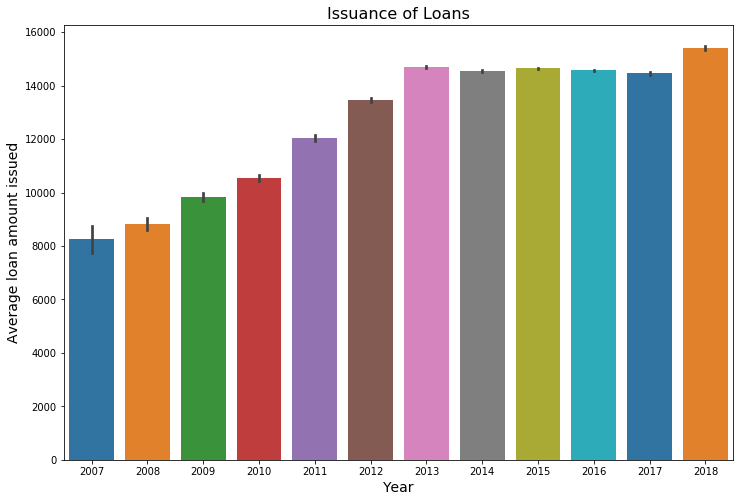

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(loan_data['issue_d'].dt.year, 'loan_amnt', data=loan_data, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [36]:
loan_data["loan_status"].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

[Text(0, 0.5, '(%)')]

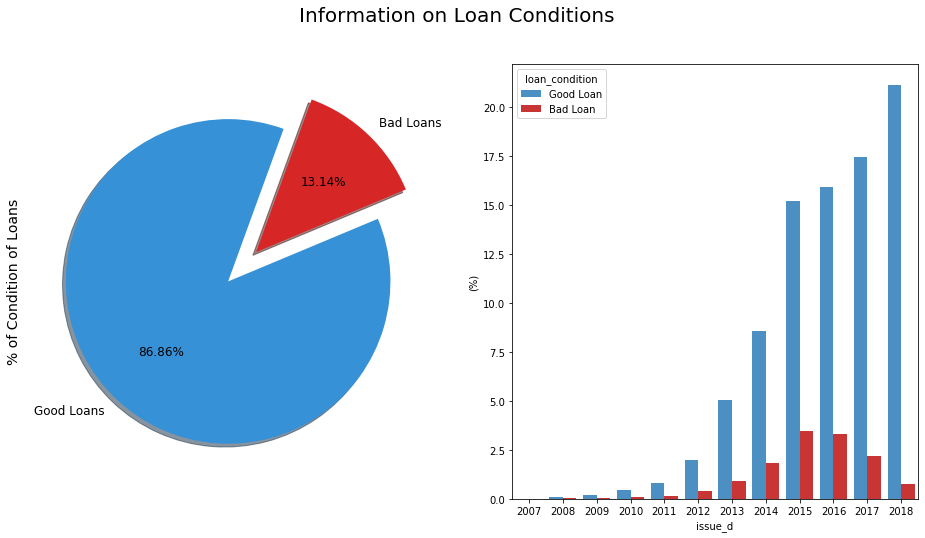

In [43]:
'''Determining the loans that are bad from loan_status column'''

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

loan_data['loan_condition'] = np.nan


def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    

# add the column
loan_data['loan_condition'] = loan_data['loan_status'].apply(loan_condition)

# plot the graph for good loan and bad loan comparision
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan_data["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', 
                                                    ax=ax[0], shadow=True, colors=colors, 
                                                    labels=labels, fontsize=12, startangle=70)


ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]

sns.barplot(x=loan_data['issue_d'].dt.year, y="loan_amnt", hue="loan_condition", data=loan_data, 
            palette=palette, estimator=lambda x: len(x) / len(loan_data) * 100)
ax[1].set(ylabel="(%)")


In [47]:
'''Take a deeper look at the bad loans'''
badloans_df = loan_data.loc[loan_data["loan_condition"] == "Bad Loan"]

loan_status_cross = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_status']).apply(
    lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_status'])

loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 

display(HTML(number_of_loanstatus.to_html()))

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
addr_state,,,,,,,
AK,617,0,1,24,8,46,696
AL,3828,1,8,110,50,311,4308
AR,2346,0,6,61,38,191,2642
AZ,6241,0,18,179,78,512,7028
CA,37653,4,101,1087,540,2934,42319
CO,4500,1,13,140,61,360,5075
CT,3334,0,12,181,63,327,3917
DC,442,0,2,26,9,45,524
DE,741,0,4,29,9,50,833
